# Nueral Network Example with 'pima-indians-diabetes.csv'

This dataset describes the medical records for Pima Indians
and whether or not each patient will have an onset of diabetes within ve years.

Fields description follow:

Pregnancies = Number of times pregnant

Glucose = Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure = Diastolic blood pressure (mm Hg)

SkinThickness = Triceps skin fold thickness (mm)

Insulin = 2-Hour serum insulin (mu U/ml)

BMI = Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction = Diabetes pedigree function

Age = Age (years)

Outcome = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)

In [1]:
#Importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense

In [2]:
columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
df = pd.read_csv('pima-indians-diabetes.csv', delimiter=',',names=columns)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Value for cols 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI' cannot be zero.

In [5]:
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']

In [6]:
for i in cols:
    median_value = df[i].median()
    df[i] = df[i].replace(0,median_value)
    #df[i].fillna(median_value, inplace=True)
    #print(median_value)

In [7]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63,0
764,2,122,70,27,30.5,36.8,0.340,27,0
765,5,121,72,23,112.0,26.2,0.245,30,0
766,1,126,60,23,30.5,30.1,0.349,47,1


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Exploratory Data Analysis

<AxesSubplot:>

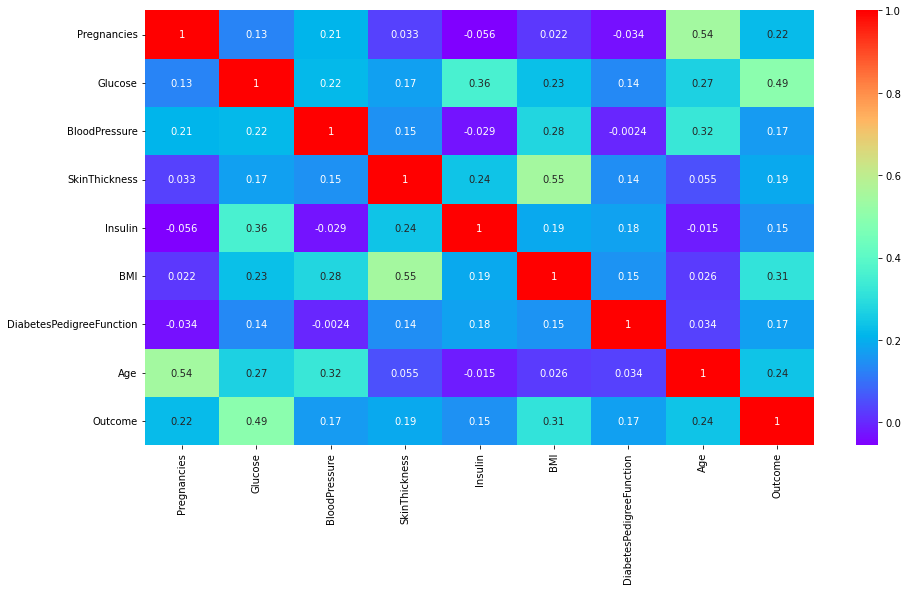

In [9]:
#Showing correlation among all.
plt.subplots(figsize=(15,8))

sns.heatmap(df.corr(),annot=True,cmap='rainbow')

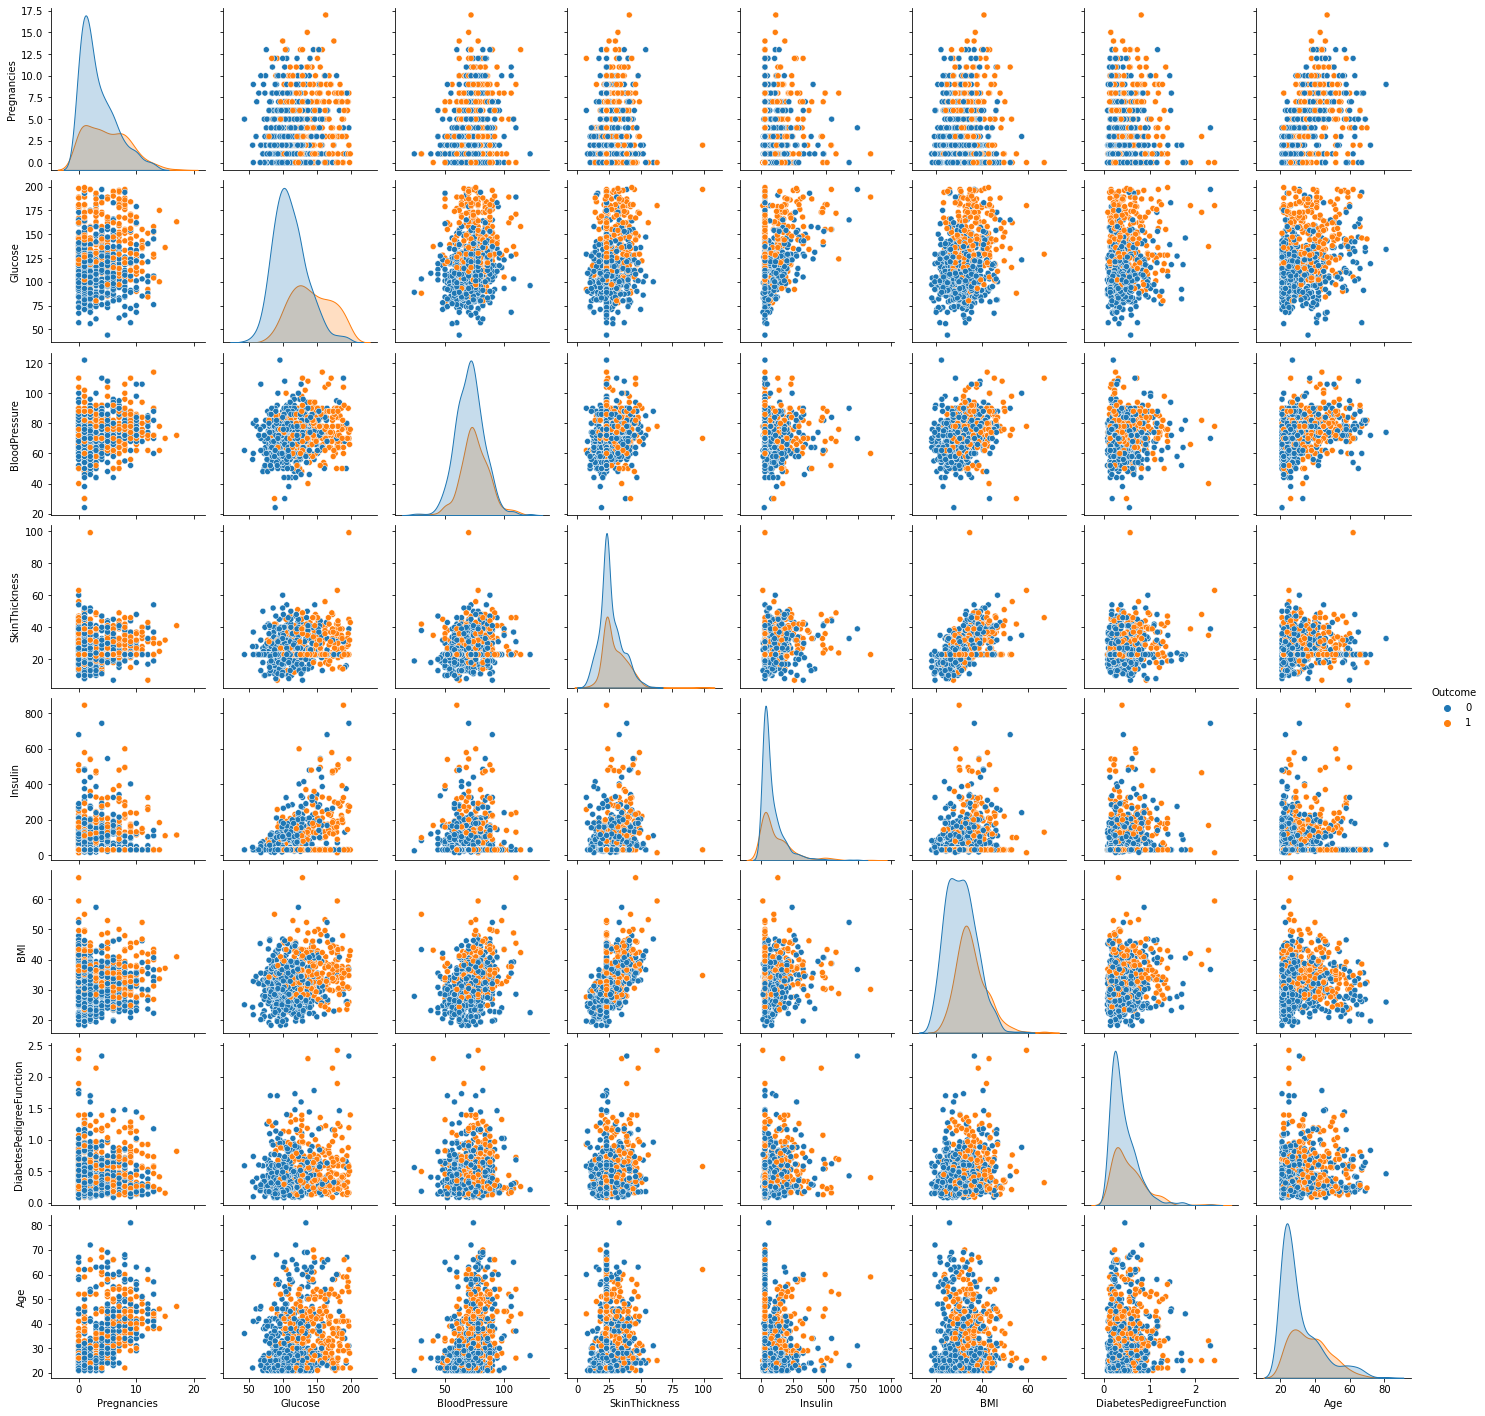

In [10]:
#Showing Outcome relation with other columns
sns.pairplot(df,hue='Outcome')

<AxesSubplot:xlabel='Outcome', ylabel='Pregnancies'>

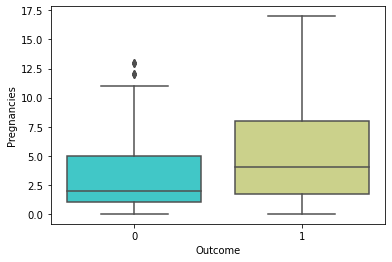

In [11]:
sns.boxplot(y='Pregnancies', x='Outcome',data=df,palette='rainbow')

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

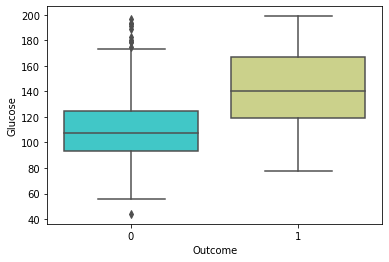

In [12]:
sns.boxplot(y='Glucose', x='Outcome',data=df,palette='rainbow')

<AxesSubplot:xlabel='Outcome', ylabel='BMI'>

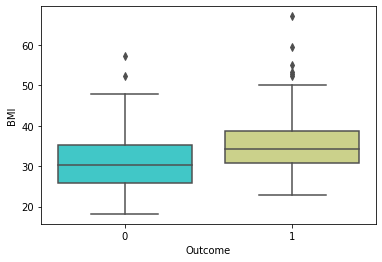

In [13]:
sns.boxplot(y='BMI', x='Outcome',data=df,palette='rainbow')

<AxesSubplot:xlabel='Outcome', ylabel='Age'>

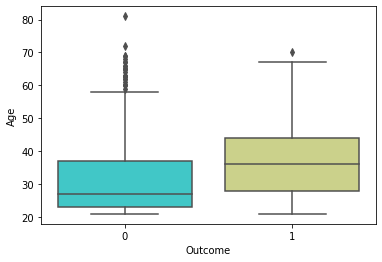

In [14]:
sns.boxplot(y='Age', x='Outcome',data=df,palette='rainbow')

<AxesSubplot:xlabel='Pregnancies', ylabel='Glucose'>

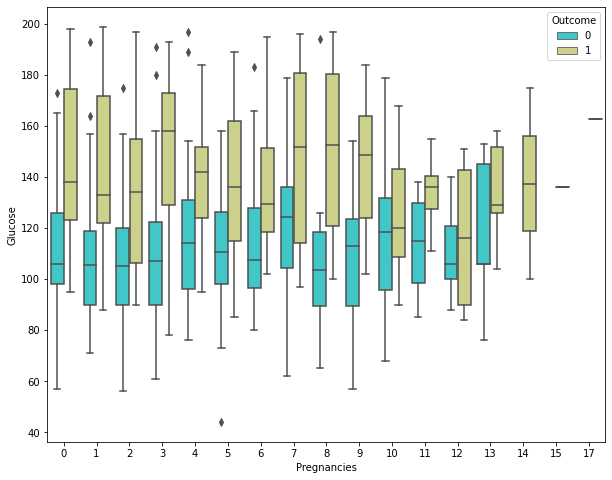

In [15]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Pregnancies', y='Glucose',hue='Outcome',data=df,palette='rainbow')

<AxesSubplot:xlabel='Pregnancies', ylabel='BMI'>

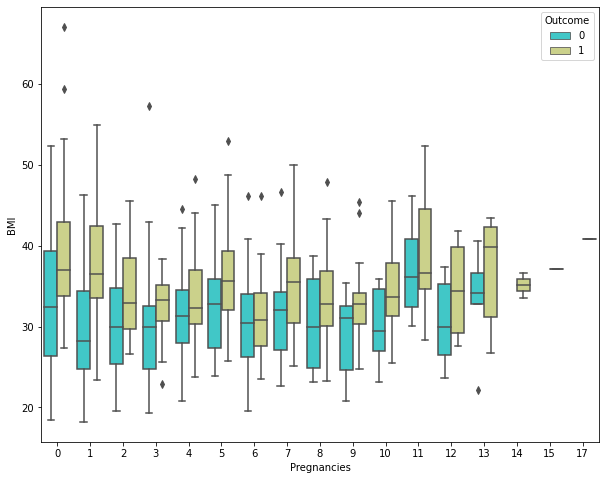

In [16]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Pregnancies', y='BMI',hue='Outcome',data=df,palette='rainbow')

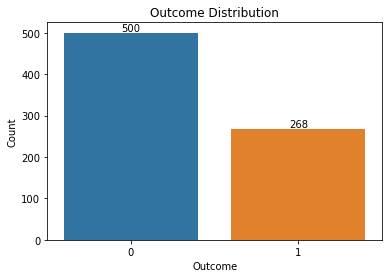

In [17]:
# Outcome Distribution
ax = sns.countplot(data=df, x='Outcome')

# Add labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
    
# Add labels and title to the plot
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Outcome Distribution')

# Display the plot
plt.show()

C:\Users\Dhruv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


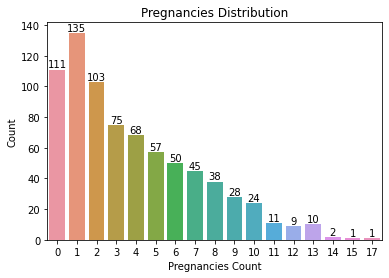

In [18]:
#Pregnancies Distribution

ax = sns.countplot(df['Pregnancies'])

# Add labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
    
# Add labels and title to the plot
plt.xlabel('Pregnancies Count')
plt.ylabel('Count')
plt.title('Pregnancies Distribution')

# Display the plot
plt.show()

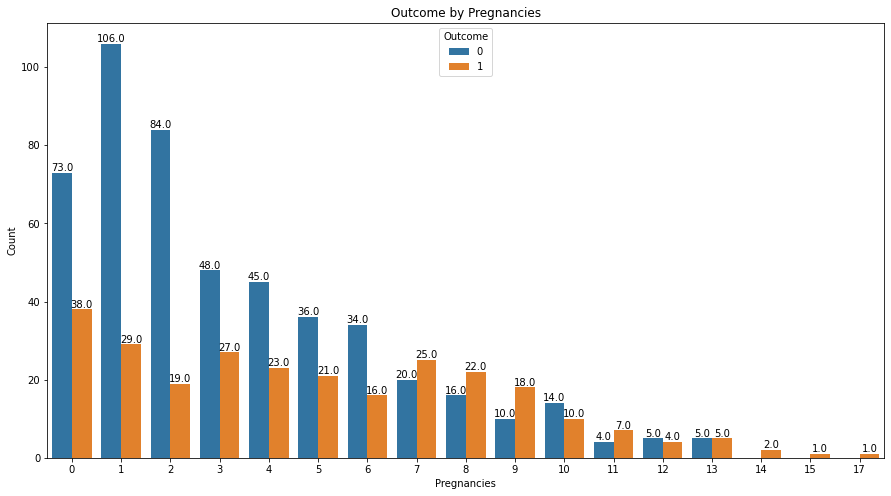

In [19]:
#Outcome by Pregnancies Distribution
plt.subplots(figsize=(15,8))
ax = sns.countplot(x='Pregnancies', hue='Outcome', data=df)

# Add labels and title to the plot
plt.xlabel('Pregnancies')
plt.ylabel('Count')
plt.title('Outcome by Pregnancies')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Display the plot
plt.show()

# Feature Engineering

In [20]:
# Specify the column names to be scaled
columns_to_scale = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

# Create an instance of MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Apply MinMax scaling to the specified columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [21]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,768.000000
mean,3.845052,7.661695e-18,-1.123956e-17,-1.499090e-16,1.214306e-17,4.803738e-16,2.462585e-16,1.857600e-16,0.348958
std,3.369578,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,0.476951
min,0.000000,-2.552931e+00,-4.002619e+00,-2.204774e+00,-7.646304e-01,-2.074100e+00,-1.189553e+00,-1.041549e+00,0.000000
25%,1.000000,-7.201630e-01,-6.937615e-01,-4.699809e-01,-6.082010e-01,-7.205635e-01,-6.889685e-01,-7.862862e-01,0.000000
50%,3.000000,-1.530732e-01,-3.198993e-02,-4.699809e-01,-6.010905e-01,-6.562636e-02,-3.001282e-01,-3.608474e-01,0.000000
75%,6.000000,6.112653e-01,6.297816e-01,5.058400e-01,3.090444e-01,6.038649e-01,4.662269e-01,6.602056e-01,1.000000
max,17.000000,2.542658e+00,4.104082e+00,7.770285e+00,7.123206e+00,5.042883e+00,5.883565e+00,4.063716e+00,1.000000


In [22]:
from sklearn.model_selection import train_test_split
X = df.drop(['Outcome'],axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [23]:
# define the keras model
model = Sequential()
model.add(Dense(8, input_dim=8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X, y, epochs=30, batch_size=10)

Epoch 1/30
77/77 [==============================] - 1s 3ms/step - loss: 1.1243 - accuracy: 0.3477
Epoch 2/30
77/77 [==============================] - 0s 3ms/step - loss: 0.7510 - accuracy: 0.4062
Epoch 3/30
77/77 [==============================] - 0s 3ms/step - loss: 0.6735 - accuracy: 0.6497
Epoch 4/30
77/77 [==============================] - 0s 3ms/step - loss: 0.6523 - accuracy: 0.6888
Epoch 5/30
77/77 [==============================] - 0s 3ms/step - loss: 0.6330 - accuracy: 0.6966
Epoch 6/30
77/77 [==============================] - 0s 3ms/step - loss: 0.6079 - accuracy: 0.7279
Epoch 7/30
77/77 [==============================] - 0s 3ms/step - loss: 0.5767 - accuracy: 0.7474
Epoch 8/30
77/77 [==============================] - 0s 3ms/step - loss: 0.5441 - accuracy: 0.7643
Epoch 9/30
77/77 [==============================] - 0s 3ms/step - loss: 0.5160 - accuracy: 0.7695
Epoch 10/30
77/77 [==============================] - 0s 3ms/step - loss: 0.4959 - accuracy: 0.7721
Epoch 11/30
77/77 [

In [24]:
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_classes)

array([[107,  16],
       [ 23,  46]], dtype=int64)

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.80
Precision: 0.74
Recall: 0.67
F1 Score: 0.70
